In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # for linear regression

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

In [3]:
np.random.seed(371)
# finding coefficients of best fit (ordinary least squares)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Closed Form OLS solution: w=(XX⊤)−1Xy⊤ where X=[x1,…,xn] and y=[y1,…,yn]
theta_best

array([[3.88095473],
       [3.08808484]])

In [4]:
X_new = np.array([[0], [2]]) # range of values is 0-2
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance (intercept)
y_predict_best = X_new_b.dot(theta_best)

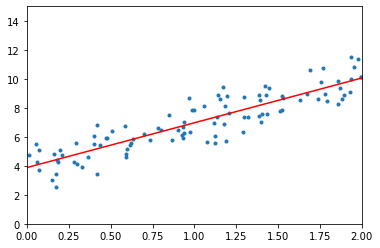

In [5]:
# plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, ".")
plt.axis([0, 2, 0, 15])
plt.plot(X_new, y_predict_best, 'r-')
plt.show()

# Batch Gradient Descent

In [18]:
eta = 0.01  # learning rate
n_iterations = 5000
m = 100 # num points

stop_criterion = 0.01

np.random.seed(371)
theta_bgd = np.random.randn(2,1)  # random initialization

# gradients_prev = np.array([[0], [0]])
current_i = 0
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_bgd) - y)
    theta_bgd = theta_bgd - eta * gradients
    current_i = current_i + 1
print('num iterations to convergence:', current_i)
print(theta_bgd)

num iterations to convergence: 5000
[[3.88095443]
 [3.08808508]]


# Batch Gradient Descent w/ Stop Criterion
stops when gradient stops changing

Change eta and look at num comparisons!

In [7]:
eta = 0.1  # learning rate (try 0.001, 1, 0.5, 0.3)
n_iterations = 1000
m = 100 # num points

stop_criterion = 0.00001

np.random.seed(371)
theta_bgd = np.random.randn(2,1)  # random initialization

# gradients_prev = np.array([[0], [0]])
current_i = 0
gradients_max = 9999

while gradients_max > stop_criterion and current_i < n_iterations:
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_bgd) - y)
    theta_bgd = theta_bgd - eta * gradients
    gradients_max = max(abs(gradients))[0]
    current_i = current_i + 1

print('num iterations to convergence:', current_i)
print(theta_bgd)

num iterations to convergence: 342
[[3.88092334]
 [3.08811087]]


In [8]:
# use theta parameters we found to predict values
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each row (intercept)
y_predict_bgd = X_new_b.dot(theta_bgd)

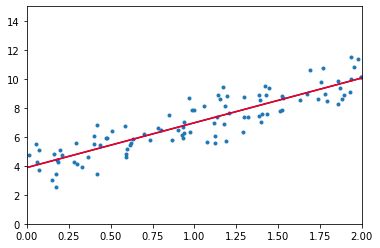

In [9]:
# plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, ".")
plt.plot(X_new, y_predict_bgd, 'b-') # batch gradient descent
plt.plot(X_new, y_predict_best, 'r-') # best fit (least squares)
plt.axis([0, 2, 0, 15])
plt.show()

# Stochastic Gradient Descent

In [10]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

np.random.seed(371)
def learning_schedule(t): # learning rate decreases further along in gradient descent
    return t0 / (t + t1)

theta_sgd = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # get random index
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi) # calculate gradient
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients
theta_sgd

array([[3.8574241 ],
       [3.08560831]])

In [11]:
# use theta parameters we found to predict values
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each row (intercept)
y_predict_sgd = X_new_b.dot(theta_sgd)

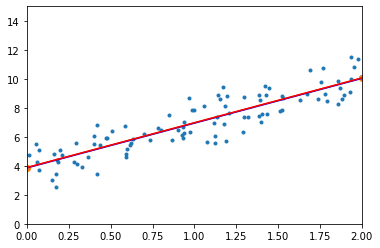

In [12]:
# plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, '.')
plt.plot(X_new, y_predict_bgd, 'o-')
plt.plot(X_new, y_predict_sgd, 'b-')
plt.plot(X_new, y_predict_best, 'r-')
plt.axis([0, 2, 0, 15])
plt.show()

# Doing SGD w/ sklearn
Let's fit a linear model w/ SGD

In [13]:
from sklearn.linear_model import SGDRegressor

In [14]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.87115882]), array([3.0640916]))